In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

import nltk,re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import json
from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
#from sklearn.model_selection import RandomizedSearchCV

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import model_from_json

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gauth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gauth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gauth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
df=pd.read_csv('./clean.csv')
# df=df.drop(columns=[1,2,3,4])
df.columns=["target","tweet"]
df.head()
df['tweet']=df['tweet'].astype('str')

<AxesSubplot:xlabel='target'>

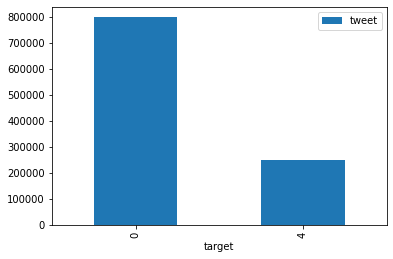

In [7]:
df.groupby(["target"]).count().plot(kind='bar')


In [4]:
# def preprocess(x):
#     w=WordNetLemmatizer()
#     j=' '
    
#     x =re.sub("[^a-zA-Z]", " ",x) ;
#     # Tokenize
#     x =nltk.word_tokenize(x);
#     # All to lowercase
#     x = [l.lower() for l in x];
#     # Remove stop words
#     x=[l for l in x if l not in stopwords.words('english')]
#     # Lemmatization
#     x=[w.lemmatize(l) for l in x];
#     # join words
#     x=j.join(x);
#     return x

In [ ]:
# df.tweet=df.tweet.apply(preprocess)
# df

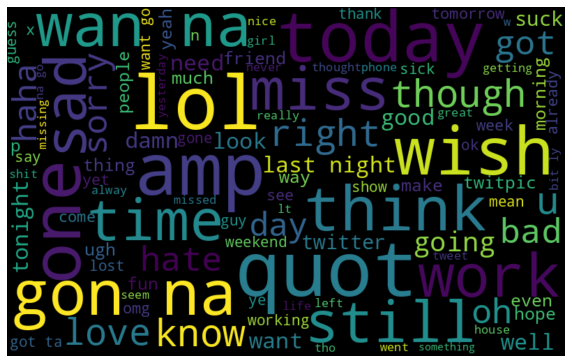

In [73]:
all_words = ' '.join([text for text in  df[df['target']==0].tweet]) # negative
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,max_words=100).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()


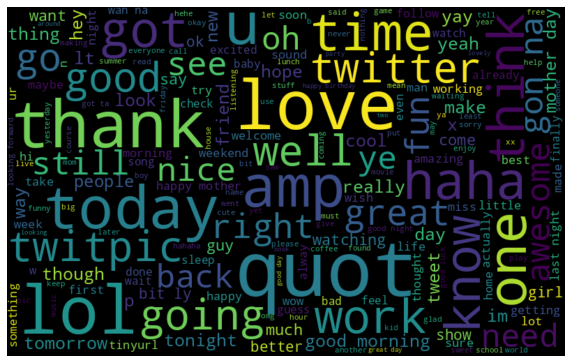

In [72]:
all_words = ' '.join([text for text in  df[df['target']==4].tweet]) # positive
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

In [6]:
embed_dim = 128
lstm_out = 196
max_features = 2000
batch_size = 32

tokenizer = Tokenizer(nb_words=max_features, split=' ')
tokenizer.fit_on_texts(df['tweet'].values)
X = tokenizer.texts_to_sequences(df['tweet'].values)
X = pad_sequences(X)

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary());

# x_train_val,x_test,Y,Y_test=train_test_split(X,df.target,test_size=0.2,)
# y_train_val = pd.get_dummies(Y).values
# y_test  = pd.get_dummies(Y_test).values

# x_train,x_val,y_train,y_val=train_test_split(x_train_val,y_train_val,test_size=0.2,)

# my_callbacks = [
#     tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
#     tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5',save_best_only=True,monitor='val_accuracy',),
# ]
# print(x_train.shape,y_train.shape)
# print(x_val.shape,y_val.shape)


# model.fit(x_train, y_train, epochs = 7, batch_size=batch_size, verbose = 2,validation_data=(x_val, y_val))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 128)           256000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 30, 128)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 196)               254800    
_________________________________________________________________
dense (Dense)                (None, 2)                 394       
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
out=model.evaluate(x_test,y_test)
model.save('model_tf/my_model')
pickle.dump(tokenizer, open('tokenizer.pkl','wb'))

# model=tf.keras.models.load_model('model_tf/my_model')
# tokenizer =  pickle.load( open('model_tf/tokenizer.pkl','rb'))

6554/6554 [==============================] - 41s 6ms/step - loss: 0.3820 - accuracy: 0.8286


In [9]:
# a=["love good human sweet"]
# tokenizer.fit_on_texts(a)
# a = tokenizer.texts_to_sequences(a)
# a = pad_sequences(a)
# b=model.predict(a)
# print(b)
# np.argmax(b,axis=1)[0]

[[0.67455196 0.32544804]
 [0.97073597 0.02926404]
 [0.588843   0.41115698]
 [0.7065407  0.29345933]
 [0.6848718  0.31512815]
 [0.59990436 0.40009558]
 [0.97073597 0.02926404]
 [0.97073597 0.02926404]
 [0.6848718  0.31512815]
 [0.6848718  0.31512815]
 [0.6686847  0.33131522]
 [0.6211704  0.3788296 ]
 [0.86462873 0.1353713 ]
 [0.6848718  0.31512815]
 [0.7732222  0.22677778]
 [0.6848718  0.31512815]
 [0.6848718  0.31512815]
 [0.49426553 0.50573444]
 [0.70654064 0.29345933]
 [0.70654064 0.29345933]
 [0.68487185 0.31512815]]


0

In [40]:
# MultinomialNB

vector=TfidfVectorizer()
x_train_MNB,x_test_MNB,y_train_MNB,y_test_MNB=train_test_split(df.tweet,df.target, test_size=0.2)
x_train_convert=vector.fit_transform(x_train_MNB)
x_test_convert=vector.transform(x_test_MNB)

clf = MultinomialNB()

clf.fit(x_train_convert,y_train_MNB)
y_pred=clf.predict(x_test_convert)

print(accuracy_score(y_test_MNB,y_pred))

0.7828529194382853


In [76]:
# XGBoost

vector=TfidfVectorizer()
x_train_XG,x_test_XG,y_train_XG,y_test_XG=train_test_split(df.tweet,df.target, test_size=0.2)
x_train_convert=vector.fit_transform(x_train_XG)
x_test_convert=vector.transform(x_test_XG)

clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=2,
              min_child_weight=3, missing=1, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, seed=42,
              silent=None, subsample=1, verbosity=1,use_label_encoder=False);

lb=LabelEncoder()
clf.fit(x_train_convert,lb.fit_transform(y_train_XG));
y_pred=clf.predict(x_test_convert);

print(accuracy_score(lb.transform(y_test_XG),y_pred))

pickle.dump(clf, open('modelxgb.pkl','wb'))
pickle.dump(vector, open('vector.pkl','wb'))

# a=["enter text to test"]
# a=vector.transform(a)
# clf.predict(a)

0.8083303530982524
